In [171]:
import pandas as pd
import numpy as np
import smogn
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

In [172]:
import lightgbm as lgb
import matplotlib.pyplot as plt

In [173]:
from sklearn.preprocessing import StandardScaler


X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [174]:
y_2_train = np.load('y_2_train.npy')
y_2_test = np.load('y_2_test.npy')
y_3_train = np.load('y_3_train.npy')
y_3_test = np.load('y_3_test.npy')
y_4_train = np.load('y_4_train.npy') #Precipitation
y_4_test = np.load('y_4_test.npy')
y_5_train = np.load('y_5_train.npy') #Precipitation intensity
y_5_test = np.load('y_5_test.npy')

X_train_class = np.copy(X_train)
y_train_class = np.copy(y_train)
X_test_class = np.copy(X_test)
y_test_class = np.copy(y_test)

scaler = StandardScaler().fit(X_train_class)
X_train_class = scaler.transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


In [175]:
#X_train = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
#X_test = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)

In [176]:
print(X_train.shape, X_test.shape)

(2552, 20) (639, 20)


In [177]:

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [178]:
#lgb_train = lgb.Dataset(X_train, y_2_train)


In [179]:
print(X_train_class)

[[-0.45880693 -0.16513392 -0.03903187 ... -0.05575163 -0.42107293
  -0.39361402]
 [ 1.24676524  1.33336874  1.42359704 ... -0.40154262 -0.78809567
  -0.62218796]
 [ 1.63051898  1.41899747  1.46661554 ... -0.32250468 -0.49050966
  -0.49299399]
 ...
 [ 0.69245428  0.64833895  0.69228259 ...  0.14184321  0.12450142
  -0.00603212]
 [-0.92783928 -0.97860679 -1.07147581 ...  1.88067789  1.44379938
   2.40890126]
 [-1.48215024 -1.83489403 -2.23297523 ...  0.53703291  0.29313349
   0.04365787]]


In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import sklearn.datasets as datasets
from sklearn.neural_network import MLPClassifier

dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifier = LGBMClassifier(boosting_type="gbdt",is_unbalance=True, random_state=5, 
                  n_estimators=300,num_leaves=30, max_depth=10,feature_fraction=0.5, 
                  bagging_fraction=0.8, bagging_freq=15, learning_rate=0.01)



# Classifier Testing

# training the best techniques using the entire dataset
X_samp, y_samp= sv.Gazzah(proportion=2.0).sample(X_train_class,y_train_class)
classifier.fit(X_samp, y_samp)
classifier.score(X_test_class, y_test_class)
preds2 = classifier.predict(X_test_class)
print(X_test)
print('Acc Score: ',accuracy_score(y_test_class, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test_class, preds2))
print('Precision Score: ',precision_score(y_test_class, preds2))
print('Recall Score: ',recall_score(y_test_class, preds2))
print('f1 score: ',f1_score(y_test_class, preds2))
preds_train = classifier.predict(X_train_class)



2022-11-30 00:34:11,700:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 2.0, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-30 00:34:11,705:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 2.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-30 00:34:11,706:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 2.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-30 00:34:11,736:INFO:Gazzah: Removing 658 majority samples


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[[ 0.22342193  0.04893789 -0.12506886 ... -0.96468794 -0.98648634
  -1.03958385]
 [-1.1410358  -1.10704988 -1.2005313  ... -0.46082107 -0.68890033
  -0.82094791]
 [-0.84256067 -1.06423552 -1.1575128  ... -0.4904603  -0.29211899
  -0.10541209]
 ...
 [ 0.05286472  0.22019534  0.26209761 ...  0.31967858  1.81082212
   0.98776763]
 [-0.0750532  -0.16513392 -0.16808736 ... -0.14466932 -0.43099246
  -0.30417204]
 [ 0.60717567 -0.03669083 -0.85638332 ... -0.73745386  0.52128276
   1.1169616 ]]
Acc Score:  0.8794992175273866
Roc Auc Score:  0.49349083895853424
Precision Score:  0.05555555555555555
Recall Score:  0.01639344262295082
f1 score:  0.0253

In [183]:
# Preparing prediction out
#X_test = np.concatenate((X_test, preds2.reshape(-1, 1)), axis=1)
#X_test = scaler.transform(X_test)
lgb_eval = lgb.Dataset(X_test, y_4_test)
#X_train_class = np.concatenate((X_train_class, preds_train.reshape(-1, 1)), axis=1)
lgb_train = lgb.Dataset(X_train, y_4_train)

In [184]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [185]:
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=150)

[1]	valid_0's l1: 2.74678	valid_0's l2: 17.3283
Training until validation scores don't improve for 150 rounds
[2]	valid_0's l1: 2.74364	valid_0's l2: 17.3121
[3]	valid_0's l1: 2.74435	valid_0's l2: 17.323
[4]	valid_0's l1: 2.74304	valid_0's l2: 17.3245
[5]	valid_0's l1: 2.74233	valid_0's l2: 17.3315
[6]	valid_0's l1: 2.74174	valid_0's l2: 17.3414
[7]	valid_0's l1: 2.73986	valid_0's l2: 17.3328
[8]	valid_0's l1: 2.73969	valid_0's l2: 17.3474
[9]	valid_0's l1: 2.73928	valid_0's l2: 17.358
[10]	valid_0's l1: 2.73977	valid_0's l2: 17.375
[11]	valid_0's l1: 2.73847	valid_0's l2: 17.3623
[12]	valid_0's l1: 2.73386	valid_0's l2: 17.3497
[13]	valid_0's l1: 2.73448	valid_0's l2: 17.3684
[14]	valid_0's l1: 2.73407	valid_0's l2: 17.3857
[15]	valid_0's l1: 2.73507	valid_0's l2: 17.383
[16]	valid_0's l1: 2.73324	valid_0's l2: 17.3709
[17]	valid_0's l1: 2.73227	valid_0's l2: 17.3929
[18]	valid_0's l1: 2.73141	valid_0's l2: 17.3853
[19]	valid_0's l1: 2.73296	valid_0's l2: 17.3848
[20]	valid_0's l1: 2

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [186]:
preds = model.predict(X_test)

In [187]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [188]:
mean_squared_error(y_4_test, preds)

17.366113951047808

In [189]:
mean_absolute_error(y_4_test, preds)

2.730187998164905

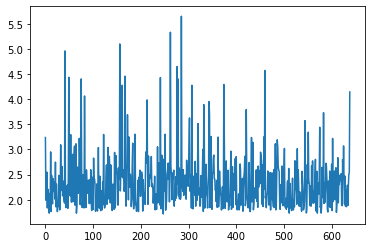

In [190]:
plt.plot(preds)

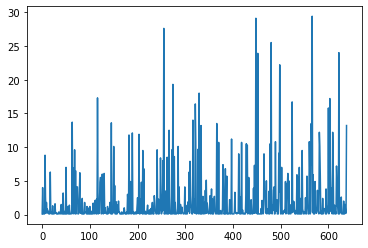

In [191]:
plt.plot(y_4_test)

In [192]:
# Classifier Testing
import lightgbm as lgbm
classifier = lgbm.Booster(model_file='lgbm_classifier.txt')
preds2 = classifier.predict(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))

LightGBMError: The number of features in data (20) is not the same as it was in training data (22).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [151]:
print(confusion_matrix(y_test, preds2))

[[536  42]
 [ 55   6]]


In [152]:
classifier.feature_importances

AttributeError: 'Booster' object has no attribute 'feature_importances'

In [153]:
# Grid search for LGBM

from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

model = lgb.LGBMRegressor( 
    boosting_type="gbdt",
    is_unbalance=True, 
    random_state=10, 
    n_estimators=50,
    num_leaves=30, 
    max_depth=8,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15, 
    learning_rate=0.01,    
)

params_opt = {'n_estimators':range(100, 601, 100), 'num_leaves':range(10,60,10), 'max_depth':range(1, 9)}
gridSearchCV = GridSearchCV(estimator = model, 
    param_grid = params_opt, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
                           refit='neg_mean_squared_error')
gridSearchCV.fit(X_train,y_4_train)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

Exception ignored in: <function Booster.__del__ at 0x000002A233D75820>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py", line 2664, in __del__
    _safe_call(_LIB.LGBM_BoosterFree(self.handle))
KeyboardInterrupt: 


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

KeyboardInterrupt: 

In [18]:
df = pd.DataFrame(gridSearchCV.cv_results_)
df = df.sort_values("rank_test_neg_mean_squared_error")
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_num_leaves,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,...,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
43,0.044853,0.003411,0.001717,0.000698,2,300,40,"{'max_depth': 2, 'n_estimators': 300, 'num_lea...",-28.085424,-32.542246,...,4.264861,1,-2.976445,-2.909533,-2.829264,-2.652513,-2.914808,-2.856513,0.112207,1
40,0.044683,0.002188,0.002168,0.000497,2,300,10,"{'max_depth': 2, 'n_estimators': 300, 'num_lea...",-28.085424,-32.542246,...,4.264861,1,-2.976445,-2.909533,-2.829264,-2.652513,-2.914808,-2.856513,0.112207,1
41,0.049479,0.003082,0.002326,0.001503,2,300,20,"{'max_depth': 2, 'n_estimators': 300, 'num_lea...",-28.085424,-32.542246,...,4.264861,1,-2.976445,-2.909533,-2.829264,-2.652513,-2.914808,-2.856513,0.112207,1
42,0.046297,0.003566,0.001868,0.000500,2,300,30,"{'max_depth': 2, 'n_estimators': 300, 'num_lea...",-28.085424,-32.542246,...,4.264861,1,-2.976445,-2.909533,-2.829264,-2.652513,-2.914808,-2.856513,0.112207,1
44,0.056367,0.004774,0.002595,0.000651,2,300,50,"{'max_depth': 2, 'n_estimators': 300, 'num_lea...",-28.085424,-32.542246,...,4.264861,1,-2.976445,-2.909533,-2.829264,-2.652513,-2.914808,-2.856513,0.112207,1


In [155]:
model = lgb.LGBMRegressor( 
    boosting_type="gbdt",
    is_unbalance=True, 
    random_state=10, 
    n_estimators=300,
    num_leaves=20, 
    max_depth=2,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15, 
    learning_rate=0.01,    
)

model.fit(X_train, y_5_train)
model.score(X_test_class, y_test_class)
preds2 = model.predict(X_test)




In [156]:
preds2 = model.predict(X_train)
np.save('intensity_train.npy', preds2)

In [157]:
print(mean_squared_error(y_4_test, preds2), mean_absolute_error(y_4_test, preds2))

ValueError: Found input variables with inconsistent numbers of samples: [639, 2552]

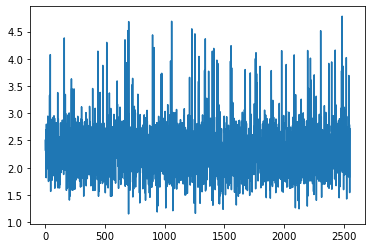

In [67]:
plt.plot(preds2)

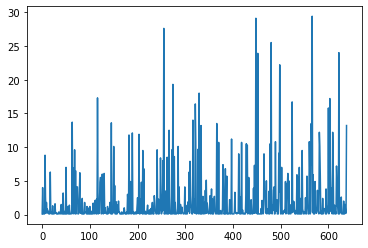

In [65]:
plt.plot(y_4_test)

In [201]:
import keras
from keras.layers import Dense
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(10, kernel_initializer='normal', activation='relu', input_shape=(20,)))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
model.compile(loss='mse', optimizer='RMSprop', metrics='mse')
model.fit(X_train, y_5_train, verbose=1, epochs=300, batch_size=64)

Epoch 1/300
40/40 [==============================] - 0s 1ms/step - loss: 6.1360 - mse: 6.1360
Epoch 2/300
40/40 [==============================] - 0s 1ms/step - loss: 5.8427 - mse: 5.8427
Epoch 3/300
40/40 [==============================] - 0s 1ms/step - loss: 5.5068 - mse: 5.5068
Epoch 4/300
40/40 [==============================] - 0s 1ms/step - loss: 5.2754 - mse: 5.2754
Epoch 5/300
40/40 [==============================] - 0s 1ms/step - loss: 5.1819 - mse: 5.1819
Epoch 6/300
40/40 [==============================] - 0s 1ms/step - loss: 5.1412 - mse: 5.1412
Epoch 7/300
40/40 [==============================] - 0s 1ms/step - loss: 5.1136 - mse: 5.1136
Epoch 8/300
40/40 [==============================] - 0s 1ms/step - loss: 5.0907 - mse: 5.0907
Epoch 9/300
40/40 [==============================] - 0s 1ms/step - loss: 5.0700 - mse: 5.0700
Epoch 10/300
40/40 [==============================] - 0s 1ms/step - loss: 5.0538 - mse: 5.0538
Epoch 11/300
40/40 [==============================] - 0s 1m

40/40 [==============================] - 0s 1ms/step - loss: 4.9120 - mse: 4.9120
Epoch 88/300
40/40 [==============================] - 0s 1ms/step - loss: 4.9117 - mse: 4.9117
Epoch 89/300
40/40 [==============================] - 0s 977us/step - loss: 4.9116 - mse: 4.9116
Epoch 90/300
40/40 [==============================] - 0s 1ms/step - loss: 4.9109 - mse: 4.9109
Epoch 91/300
40/40 [==============================] - 0s 1ms/step - loss: 4.9107 - mse: 4.9107
Epoch 92/300
40/40 [==============================] - 0s 1ms/step - loss: 4.9101 - mse: 4.9101
Epoch 93/300
40/40 [==============================] - 0s 1ms/step - loss: 4.9105 - mse: 4.9105
Epoch 94/300
40/40 [==============================] - 0s 1ms/step - loss: 4.9047 - mse: 4.9047
Epoch 95/300
40/40 [==============================] - 0s 1ms/step - loss: 4.9096 - mse: 4.9096
Epoch 96/300
40/40 [==============================] - 0s 1ms/step - loss: 4.9082 - mse: 4.9082
Epoch 97/300
40/40 [==============================] - 0s 1ms/

40/40 [==============================] - 0s 1ms/step - loss: 4.8696 - mse: 4.8696
Epoch 173/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8700 - mse: 4.8700
Epoch 174/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8667 - mse: 4.8667
Epoch 175/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8677 - mse: 4.8677
Epoch 176/300
40/40 [==============================] - 0s 976us/step - loss: 4.8670 - mse: 4.8670
Epoch 177/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8636 - mse: 4.8636
Epoch 178/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8680 - mse: 4.8680
Epoch 179/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8621 - mse: 4.8621
Epoch 180/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8639 - mse: 4.8639
Epoch 181/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8635 - mse: 4.8635
Epoch 182/300
40/40 [==============================]

40/40 [==============================] - 0s 1ms/step - loss: 4.8347 - mse: 4.8347
Epoch 258/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8385 - mse: 4.8385
Epoch 259/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8354 - mse: 4.8354
Epoch 260/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8353 - mse: 4.8353
Epoch 261/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8318 - mse: 4.8318
Epoch 262/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8354 - mse: 4.8354
Epoch 263/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8302 - mse: 4.8302
Epoch 264/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8334 - mse: 4.8334
Epoch 265/300
40/40 [==============================] - 0s 1ms/step - loss: 4.8334 - mse: 4.8334
Epoch 266/300
40/40 [==============================] - 0s 951us/step - loss: 4.8328 - mse: 4.8328
Epoch 267/300
40/40 [==============================]

In [202]:
preds2 = model.predict(X_test)
print(mean_squared_error(y_5_test, preds2), mean_absolute_error(y_5_test, preds2))

20/20 [==============================] - 0s 1ms/step
5.785315017138916 1.3085459231397543


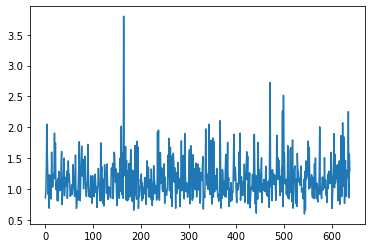

In [203]:
plt.plot(preds2)

In [205]:
preds2 = model.predict(X_train)
np.save('intensity_train.npy', preds2)

80/80 [==============================] - 0s 976us/step
